                                                GROUP1
                            Exploratory Data Analysis on Graduate Admission Dataset


Team Members: 
Hrishikesh Suvarna,
Phaneesha chilaveni,
Shiva Jyothika, 
Savitri Vemparala

Problem statement:
Currently students are facing difficulties in applying for the right universities that suits their profile with less chances of rejection. As every university have their set of parameters to accept student application, it becomes difficult for a student to understand the probability of acceptance.
The main objective of this project is to visualise and determine the significance of each parameter and predict the admit chances of a candidate based on certain parameters.


### Importing all the required libraries for the analysis on the data

In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import sqlite3
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Creating a Database "dbfile.db" and populating table - GRADADMIT from the data fetched from .csv files.

In [2]:

connec=sqlite3.connect("dbfile.db",True)
cursor=connec.cursor()
cursor.execute('''CREATE TABLE IF NOT EXISTS GRADADMIT(
    GRE_Score INT,
    TOEFL_Score INT,
    University_ranking INT,
    SOP DECIMAL,
    LOR DECIMAL,
    CGPA DECIMAL,
    Research INT,
    Chance_of_admit DECIMAL)''')

df = pd.read_csv("/Users/phanee/Downloads/Python Project/Admission_Predict_Ver1.1.csv")
for index,row in df.iterrows():
    cursor.execute('INSERT INTO GRADADMIT(GRE_Score,TOEFL_Score,University_ranking,SOP,LOR,CGPA,Research,Chance_of_admit) VALUES (?,?,?,?,?,?,?,?)',list((row['GRE Score']
                                                                         ,row['TOEFL Score'],
                                                                         row['University Rating'],
                                                                         row['SOP'],row['LOR '],
                                                                         row['CGPA'],row['Research'],
                                                                         row['Chance of Admit ']*100)))
connec.commit()
sql_statement = 'SELECT * FROM GRADADMIT'
sample = pd.read_sql_query(sql_statement,connec)
sample['Chance_of_admit'] = sample['Chance_of_admit'].round(2)


In [3]:
sample.dtypes


GRE_Score               int64
TOEFL_Score             int64
University_ranking      int64
SOP                   float64
LOR                   float64
CGPA                  float64
Research                int64
Chance_of_admit       float64
dtype: object

### Correlation plot to determine the relationship between all of the variables.

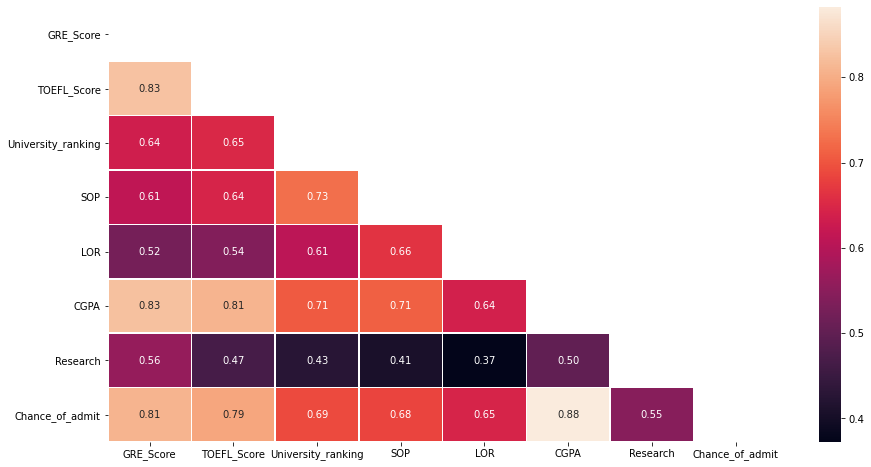

In [4]:
corr = sample.corr()
fig, ax = plt.subplots(figsize=(15, 8))
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
sns.heatmap(corr, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

##### Inferences from the above correlation plot:

We can see that the most important elements impacting the possibility of admission are CGPA, GRE score, and TOEFL score.




### This below bar graph illustrates the distribution of students based on their GRE scores.

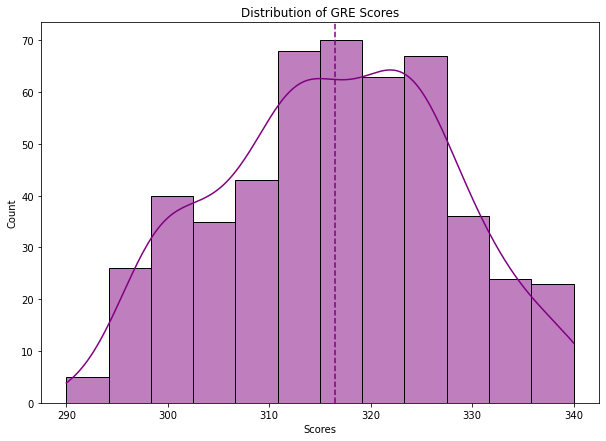

The mean of the GRE Scores :  316.472


In [5]:
fig,ax=plt.subplots(figsize = (10,7))
sns.histplot(sample['GRE_Score'],kde=True,color='purple',ax=ax)
mean=sample['GRE_Score'].mean()
ax.axvline(mean, color='purple', linestyle='--')
plt.title('Distribution of GRE Scores')
plt.xlabel('Scores')
plt.show()
print("The mean of the GRE Scores : ",mean)

##### Inferences from the above plot:
We could observe that most of the students scores are in the range of 310- 325 and a average score of 316.47

### Similarly this below bar graph explains the distribution of students based on their TOEFL score.

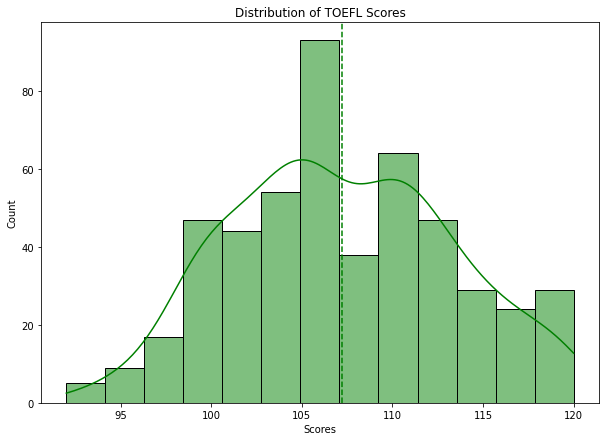

The mean of the TOEFL Scores :  107.192


In [6]:
fig,ax=plt.subplots(figsize = (10,7))
sns.histplot(sample['TOEFL_Score'],kde=True,color='green',ax=ax)
mean=sample['TOEFL_Score'].mean()
ax.axvline(mean, color='green', linestyle='--')
plt.title('Distribution of TOEFL Scores')
plt.xlabel('Scores')
plt.show()
print("The mean of the TOEFL Scores : ",mean)

##### Inferences from the above plot:
We can observe that most of the students TOEFL score varies from 100 to 112 and average score being 107.

### Similarly this below bar graph explains the distribution of students based on their CGPA.

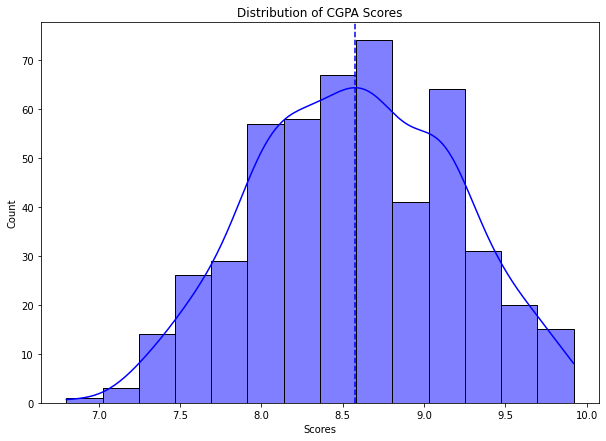

The mean of the CGPA :  8.576440000000003


In [7]:
fig,ax=plt.subplots(figsize = (10,7))
sns.histplot(sample['CGPA'],kde=True,color='blue',ax=ax)
mean=sample['CGPA'].mean()
ax.axvline(mean, color='blue', linestyle='--')
plt.title('Distribution of CGPA Scores')
plt.xlabel('Scores')
plt.show()
print("The mean of the CGPA : ",mean)

##### Inferences from the above plot:
We can observe that most of the students CGPA varies from 7.7 to 9.2 and average score being 8.57.

### Creating new dataframe containing GRE Score,TOEFL Score,CGPA and chance of admit and total as a new variable

In [8]:
total = 0.81+0.78+0.88


sql_statement = """SELECT GRE_Score,
    TOEFL_Score,
    CGPA ,
    round(Chance_of_admit,2) as Chance_of_admit,
    round((((0.81/{})*(GRE_Score-260)*100/80)+
    ((0.78/{})*(TOEFL_Score)*100/120)+
    ((0.88/{})*(CGPA)*100/10)),2) AS Total_Score

    FROM GRADADMIT""".format(total,total,total)
test = pd.read_sql_query(sql_statement,connec)
    
    


### Normalized the total score and converting to a scale of 100.

In [9]:

test['Total_Score'] = round((test['Total_Score']-test['Total_Score'].min())/(test['Total_Score'].max() -test['Total_Score'].min())*100,2)

###  Scatter plot between the Total_Score and chance of admit to check the relation.

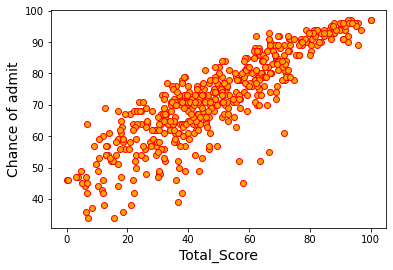

In [10]:

plt.scatter('Total_Score','Chance_of_admit',data = test,c='orange',edgecolors='red')
plt.ylabel('Chance of admit', fontsize=14)
plt.xlabel('Total_Score', fontsize=14)
plt.show()

### Correlation Plot between Total and Chance of admit

The correlation coefficient is :  0.8721919392577344


<AxesSubplot:>

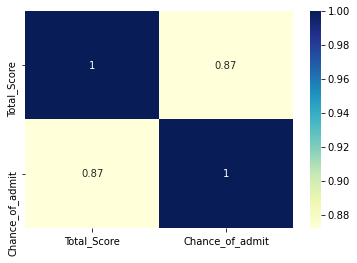

In [11]:
corr_tc = (test[['Total_Score','Chance_of_admit']].corr())
print('The correlation coefficient is : ',corr_tc.iloc[0][1])
sns.heatmap(corr_tc,annot = True,cmap="YlGnBu")

##### Inference from above plot:
We can see that total has high positive correlation with chance of admit having correlation coefficient of 0.87.

### Boxplots  

<AxesSubplot:xlabel='Chance_of_admit', ylabel='Total_Score'>

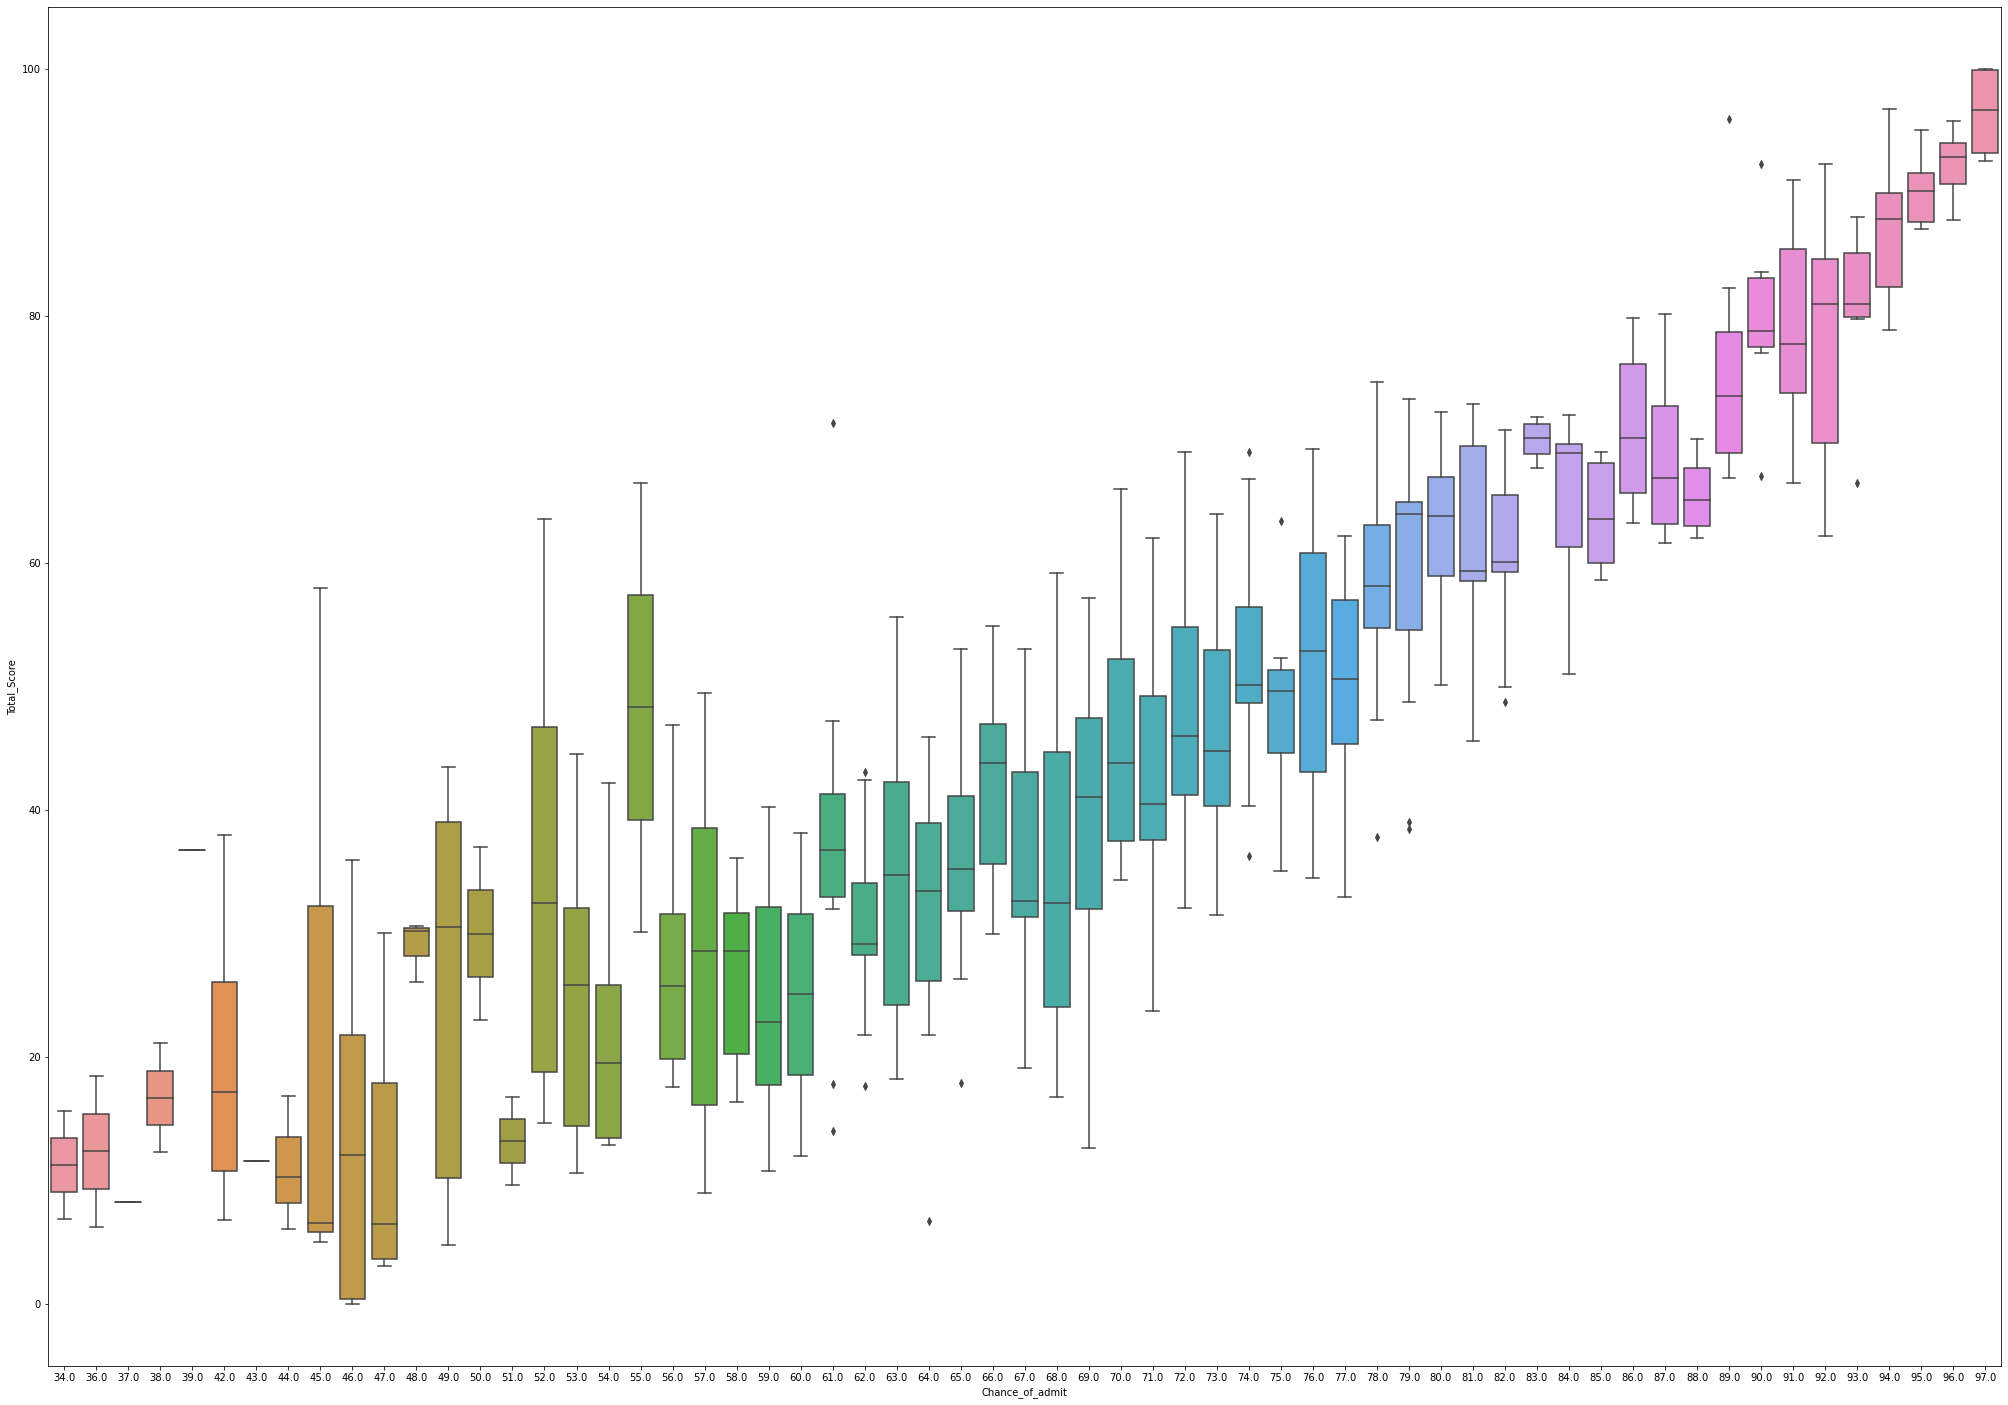

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(35, 25)
sns.boxplot(x="Chance_of_admit", y="Total_Score", data=test,width=0.8)

##### Inference from above box plots:
We can observe outliers in few of the box plots which indicate the influence of other features like LOR,SOP and Research on the chance of admit.

### Categorizing the chance of admit into Easy,Moderate,Difficult by adding a new column 'Admit Possibility' into the dataframe.

In [13]:
import warnings
warnings.filterwarnings("ignore")
test['Admit Possibility']=0
for i in range(0,len(test)):
    if(test['Chance_of_admit'][i]>75):
        test['Admit Possibility'][i]='Easy'
    elif(test['Chance_of_admit'][i]<55):
        test['Admit Possibility'][i]='Difficult'
    else:
        test['Admit Possibility'][i]='Moderate'

### Boxplot for Admit possibility and total 

<AxesSubplot:xlabel='Admit Possibility', ylabel='Total_Score'>

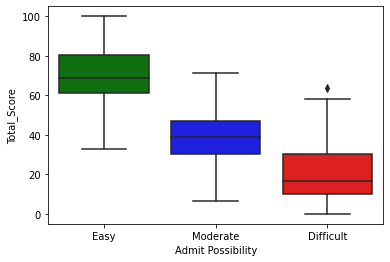

In [14]:
sns.boxplot(x = 'Admit Possibility',y = 'Total_Score',data = test,palette = ['green','blue','red'])


##### Inference from above plot :
This boxplot suggests that applicants with higher total usually get into desired universities easier than the rest.


### Violinplot 

<AxesSubplot:xlabel='Admit Possibility', ylabel='Total_Score'>

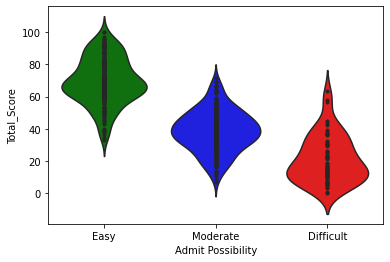

In [15]:
sns.violinplot(x="Admit Possibility",y="Total_Score",data=test, inner="points",palette = ['green','blue','red'])

### Histogram for Total and Admit possibility

<AxesSubplot:xlabel='Total_Score', ylabel='Count'>

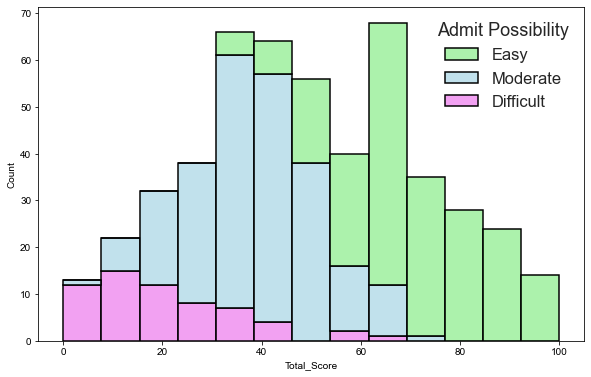

In [16]:
fig = plt.figure(figsize=(16,10))
colours=['lightgreen','lightblue','violet']
plt.subplot(2,2,1)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=test, x="Total_Score", hue="Admit Possibility",multiple="stack",palette=colours)

##### Inference from above plot:
This graph also supports the previous statement that applicants with higher total usually get into desired universities easier than the rest.


### Taking university ranking into consideration 

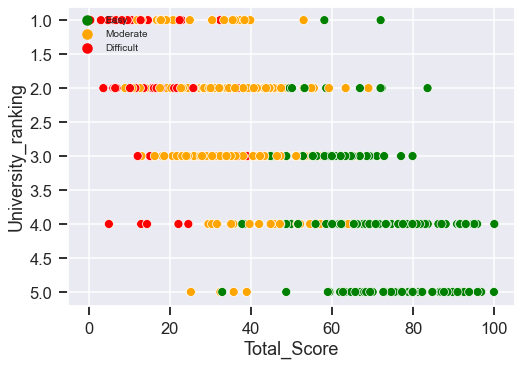

In [29]:
test['University_ranking'] = sample['University_ranking']
sns.scatterplot('Total_Score','University_ranking',data = test,palette = ['green','orange','red'],hue = 'Admit Possibility')
plt.legend(loc = 'upper left',fontsize = 10)

##### Inference from above plot:

Scatterplot explains the number of applications and admit possibilities to a university based on their totals .

### Impact of research on different universities 

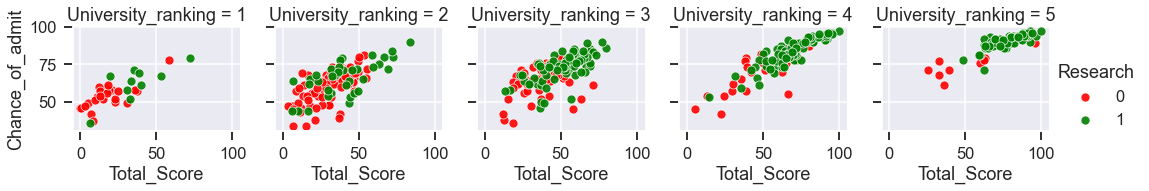

In [30]:
test['Research'] = sample['Research']
colours = ['red','green']
g = sns.FacetGrid(test, col="University_ranking",palette = colours, hue="Research")
g.map(sns.scatterplot, 'Total_Score', "Chance_of_admit", alpha=.9)
g.add_legend()

##### Inferences from above plot
This plot suggests that chances of admit are increased marginally for applicants with research papers.
Scatter plot shows the influence of research on the chance of admit for different categories of university ranking.
For each university category we see that as the total increases probability of getting an admit also increases. A lot of green dots to the right and red dots to the left indicates that higher totals makes admits easier.

### Convert the university ranking and research features as categorical as they are categories 

In [19]:
sample[['University_ranking','Research']] = sample[['University_ranking','Research']].astype('category') 
sample.dtypes

GRE_Score                int64
TOEFL_Score              int64
University_ranking    category
SOP                    float64
LOR                    float64
CGPA                   float64
Research              category
Chance_of_admit        float64
dtype: object

### Fitting the linear model
$$R^2 = 1 - \frac{RSS}{TSS}$$

In [20]:
x = sample.drop(['Chance_of_admit'],1,inplace = False).values
y =  sample['Chance_of_admit'].values
model = linear_model.LinearRegression()



In [21]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state=7)
lm_model = model.fit(X_train,y_train)
y_pred = lm_model.predict(X_test)
print('r2 score is :',r2_score(y_test,y_pred))
print('root_mean_squared error of is :',np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is : 0.8208368133941129
root_mean_squared error of is : 6.078966407223253


In [22]:
error_df = pd.DataFrame({'y_test' : y_test,'y_pred' :y_pred})


### Graph 

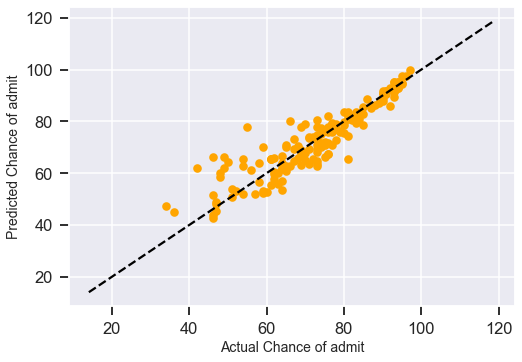

In [23]:
plt.scatter(x='y_test', y='y_pred', data=error_df ,c = 'orange',s = 50)

line_coords = np.arange(error_df[['y_test', 'y_pred']].min().min()-20, 
                        error_df[['y_test', 'y_pred']].max().max()+20)
plt.plot(line_coords,line_coords  ,
         color='black', linestyle='--')
plt.ylabel('Predicted Chance of admit', fontsize=14)
plt.xlabel('Actual Chance of admit', fontsize=14)
plt.show()

In [24]:
cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(model,sample.drop(['Chance_of_admit'],1,inplace = False),sample['Chance_of_admit'], scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
print("neg_root_mean_squared_error are :",scores)
z = 0
for i in scores:
    z+=i
print('root mean squared error: ',abs(z/5))


neg_root_mean_squared_error are : [-5.88141046 -7.22249569 -5.12872325 -6.27978564 -5.75005546]
root mean squared error:  6.052494098667923


In [25]:

GRE =int(input("Enter GRE score: "))
while GRE not in range(260,341):
    print("Please enter valid GRE score")
    GRE = int(input("Enter GRE score :"))
    
TOEFL = int(input("Enter TOEFL score: "))
while TOEFL not in range(0,121):
    print("Please enter valid TOEFL score")
    TOEFL = int(input("Enter TOEFL score"))
    
SOP = float(input("Enter SOP rating: "))
while SOP not in [0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5]:
    print("Please enter valid SOP rating")
    SOP = float(input("Enter SOP rating: "))
    
LOR = float(input("Enter LOR rating: "))
while LOR not in [0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5]:
    print("Please enter valid LOR rating")
    LOR = float(input("Enter LOR rating: "))
    
CGPA = float(input("Enter CGPA: "))
while (CGPA<5 or CGPA>10) :
    print("Please enter valid CGPA score")
    CGPA = float(input("Enter CGPA: "))
    
Research = int(input("Enter Research value: "))
while Research not in [0,1]:
    print("Please enter valid Research value")
    Research = int(input("Enter Research value: "))
    
for i in range(1,6):
    University_ranking = i
    new_data = [(GRE,TOEFL,University_ranking,SOP,LOR,CGPA,Research)]

    new_array = np.asarray(new_data)
    prediction=lm_model.predict(new_array)
    if prediction<0:
        print('chance of admit : 0%')
    elif prediction>100:
        print('chance of admit : 100%')
    else:
        print('for university ranking : {} ,chance of admit : {}%'.format(i,round(prediction[0],2)))

Enter GRE score: 300
Enter TOEFL score: 100
Enter SOP rating: 4
Enter LOR rating: 5
Enter CGPA: 8
Enter Research value: 0
for university ranking : 1 ,chance of admit : 60.28%
for university ranking : 2 ,chance of admit : 60.68%
for university ranking : 3 ,chance of admit : 61.09%
for university ranking : 4 ,chance of admit : 61.5%
for university ranking : 5 ,chance of admit : 61.91%
